In [24]:
import sys, math
from skimage import data, io, filters, color, img_as_ubyte, transform
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from collections import defaultdict

Part 1:

In [46]:
def plotHistogram(im) :
    if len(im.shape) != 2:
        im = im[:,:,0]
    mapp = [0] * 256
    for row in range(im.shape[0]):
        for col in range(im.shape[1]):
            key = im[row][col]
            mapp[key] += 1
    pixel_count = sum(mapp)
    mapp = [(val * 1.0)/pixel_count for val in mapp]
    plt.figure()
    plt.bar(range(256), mapp)
    plt.show()

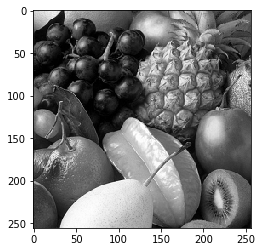

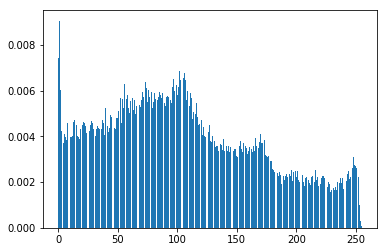

In [51]:
im = imread('./A1_resources/Q4/fruit.bmp')
plt.figure()
plt.imshow(im, cmap = "gray")
plotHistogram(im)

Part 2:


In [52]:
lena = imread('./A1_resources/Q4/lena.bmp')
lena_list = []
lena_list.append(img_as_ubyte(transform.rescale(lena, 0.5)))
for i in range(4):
    lena_list.append(img_as_ubyte(transform.rescale(lena_list[i], 0.5)))

/home/kritika/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/kritika/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/kritika/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/kritika/.local/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 t

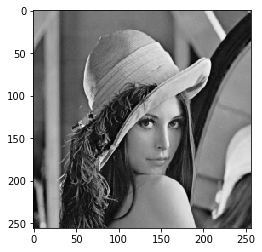

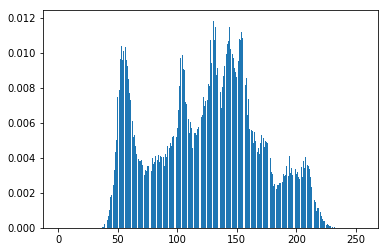

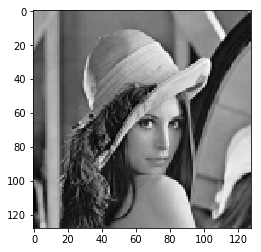

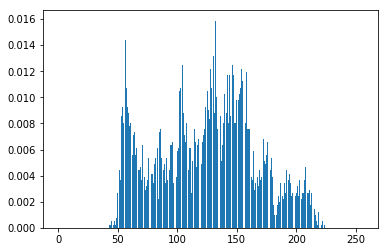

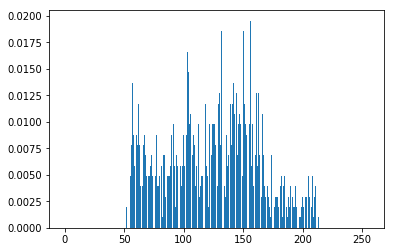

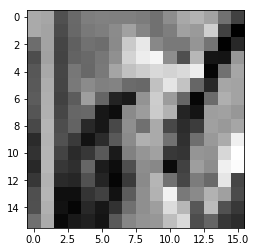

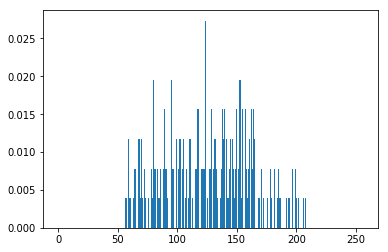

In [54]:
for lena in lena_list:
    plt.figure()
    plt.imshow(lena, cmap = "gray")
    plotHistogram(lena)

Histogram representation storage:

| Resolution             | 16x16 | 32x32 | 64x64 | 128x128 | 256x256 |  
| ---------------------- |:-----:|:-----:|:-----:|:-------:|--------:|  
| Histogram size (bytes) | 1024  | 1024  | 1024  | 1024    | 1024    |  
| Raw size (bytes)       | 256   | 1024  | 4096  | 16348   | 65536   |  

Understanding and Observations:  

By decreasing the size of the image, we are sampling the image. This means that the frequencies of multiple intensities will go down, which is evident from the graphs. The distribution seems more continuous at a higher number of samples, which matches our intuition of sampling, that an infinitesimally small resolution would result in a continuous image.

There is a huge loss in image quality from 32x32 to 16x16, but not so much loss in image quality from 256x256 to 128x128.